# Data Exploration

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np

In [ ]:
# Loading the dataset
df = pd.read_csv("datasets/All.csv")

In [3]:
# Visualizing the first few (5) rows of the data
df.head()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,ldl_domain,ldl_path,ldl_filename,ldl_getArg,dld_url,dld_domain,dld_path,dld_filename,dld_getArg,urlLen,domainlength,pathLength,subDirLen,fileNameLen,this.fileExtLen,ArgLen,pathurlRatio,ArgUrlRatio,argDomanRatio,domainUrlRatio,pathDomainRatio,argPathRatio,executable,isPortEighty,NumberofDotsinURL,ISIpAddressInDomainName,CharacterContinuityRate,LongestVariableValue,URL_DigitCount,host_DigitCount,Directory_DigitCount,File_name_DigitCount,Extension_DigitCount,Query_DigitCount,URL_Letter_Count,host_letter_count,Directory_LetterCount,Filename_LetterCount,Extension_LetterCount,Query_LetterCount,LongestPathTokenLength,Domain_LongestWordLength,Path_LongestWordLength,sub-Directory_LongestWordLength,Arguments_LongestWordLength,URL_sensitiveWord,URLQueries_variable,spcharUrl,delimeter_Domain,delimeter_path,delimeter_Count,NumberRate_URL,NumberRate_Domain,NumberRate_DirectoryName,NumberRate_FileName,NumberRate_Extension,NumberRate_AfterPath,SymbolCount_URL,SymbolCount_Domain,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,4,5,5.5,14,4.400000,4,8,3,0,0,0,0,0,0,0,0,0,0,58,25,26,26,13,1,2,0.448276,0.034483,0.08,0.431034,1.04,0.076923,0,-1,5,-1,0.6,-1,1,0,0,0,1,-1,47,22,8,13,0,-1,13,14,13,5,-1,0,0,3,0,2,-1,0.017241,0.0,0.0,0.066667,1.0,-1.0,8,3,2,1,0,-1,0.726298,0.784493,0.894886,0.850608,NaN,-1.0,Defacement
1,0,4,5,5.5,14,6.000000,4,12,4,0,0,0,0,0,0,0,0,0,0,66,25,34,34,2,2,2,0.515151,0.030303,0.08,0.378788,1.36,0.058824,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,56,22,8,13,9,-1,13,14,13,5,-1,0,0,4,0,1,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.688635,0.784493,0.814725,0.859793,0.0,-1.0,Defacement
2,0,4,5,5.5,14,5.800000,4,12,5,0,0,0,0,0,0,0,0,0,0,65,25,33,33,2,2,2,0.507692,0.030769,0.08,0.384615,1.32,0.060606,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,55,22,8,13,8,-1,13,14,13,5,-1,0,0,4,0,1,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.695049,0.784493,0.814725,0.801880,0.0,-1.0,Defacement
3,0,4,12,5.5,14,5.500000,4,32,16,0,0,0,0,0,0,0,0,0,0,109,25,77,77,2,2,2,0.706422,0.018349,0.08,0.229358,3.08,0.025974,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,92,22,8,13,45,-1,52,14,13,13,-1,0,0,4,0,8,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.640130,0.784493,0.814725,0.663210,0.0,-1.0,Defacement
4,0,4,6,5.5,14,7.333334,4,18,11,0,0,0,0,0,0,0,0,0,0,81,25,49,49,2,2,2,0.604938,0.024691,0.08,0.308642,1.96,0.040816,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,70,22,8,13,23,-1,24,14,13,13,-1,0,0,4,0,2,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.681307,0.784493,0.814725,0.804526,0.0,-1.0,Defacement


In [4]:
# Checking the shape of the datset
df.shape

(36707, 80)

In [ ]:
# Replacing infinity values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [6]:
# Checking if there are null or duplicate values in the datset
print("Number of null values:", df.isna().values.sum())
print("Number of duplicate values:", df.duplicated().sum())

Number of null values: 19193
Number of duplicate values: 9754


In [7]:
# Dropping the duplicated values from the dataset
df.drop_duplicates(inplace=True)

In [8]:
# Checking if duplicated were dropped successfully
print(df.duplicated().values.any())
print("New data shape:", df.shape)

False
New data shape: (26953, 80)


In [9]:
# Checking for the columns that contain null values
cols_with_null = []
for col in df.columns:
    if df[col].isna().values.any():
        cols_with_null.append(col)
        print(f"Column {col} has null values")

Column avgpathtokenlen has null values
Column argPathRatio has null values
Column NumberRate_DirectoryName has null values
Column NumberRate_FileName has null values
Column NumberRate_Extension has null values
Column NumberRate_AfterPath has null values
Column Entropy_DirectoryName has null values
Column Entropy_Filename has null values
Column Entropy_Extension has null values
Column Entropy_Afterpath has null values


In [10]:
# Visualizing samples from the columns with missing data
df[cols_with_null].sample(10)

,avgpathtokenlen,argPathRatio,NumberRate_DirectoryName,NumberRate_FileName,NumberRate_Extension,NumberRate_AfterPath,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath
12125,5.000000,0.033898,0.800000,0.000000,0.000000,-1.000000,0.879588,0.685428,1.000000,-1.000000
33419,3.500000,0.550000,0.000000,0.235294,0.307692,0.363636,0.871049,0.827867,0.834184,0.841910
1925,3.000000,0.181818,0.000000,0.000000,0.000000,-1.000000,NaN,1.000000,1.000000,-1.000000
22440,6.700000,0.665217,0.258065,0.458333,0.490446,0.503268,0.731665,0.618288,0.611351,0.604547
16527,4.785714,0.024691,0.666667,0.000000,NaN,-1.000000,0.674567,0.646588,0.000000,-1.000000
33181,4.333334,0.333333,0.000000,0.086957,0.166667,0.250000,NaN,0.831705,0.907019,0.916667
10817,4.375000,0.047619,0.333333,0.000000,NaN,-1.000000,0.856714,0.829562,0.000000,-1.000000
14779,3.000000,0.850000,0.000000,0.019231,NaN,0.019608,0.916667,0.753751,0.000000,0.747683
3521,3.500000,0.400000,0.000000,0.045455,0.062500,0.083333,0.916667,0.882682,0.863205,0.842981
26346,11.333333,0.054054,0.000000,0.562500,NaN,-1.000000,0.750000,0.716974,0.000000,-1.000000


### Handling Null Values

In [11]:
# Checking for the number of null values per column
for col in df[cols_with_null]:
    print("{} missing values in {} column\n".format((df[cols_with_null][col].isna().values.sum()), col))

235 missing values in avgpathtokenlen column

10 missing values in argPathRatio column

10 missing values in NumberRate_DirectoryName column

10 missing values in NumberRate_FileName column

8661 missing values in NumberRate_Extension column

3 missing values in NumberRate_AfterPath column

5561 missing values in Entropy_DirectoryName column

200 missing values in Entropy_Filename column

37 missing values in Entropy_Extension column

6 missing values in Entropy_Afterpath column



In [ ]:
# Replacing the missing values with the mean of each of the columns
for col in cols_with_null:
    col_mean = df[col].mean()
    if pd.isna(col_mean):
        col_mean = 0
    print(f"Replacing missing values with mean: '{col_mean}' in {col} column")
    df[col] = df[col].fillna(col_mean)


Replacing missing values with mean: '4.767273084568456' in avgpathtokenlen column
Replacing missing values with mean: '0.3139529136295884' in argPathRatio column
Replacing missing values with mean: '0.0021207257062687895' in NumberRate_DirectoryName column
Replacing missing values with mean: '0.09632719106951342' in NumberRate_FileName column
Replacing missing values with mean: '0.0220079533579543' in NumberRate_Extension column
Replacing missing values with mean: '-0.5551027924195213' in NumberRate_AfterPath column
Replacing missing values with mean: '0.6712553775739295' in Entropy_DirectoryName column
Replacing missing values with mean: '0.7031826057071282' in Entropy_Filename column
Replacing missing values with mean: '0.4580622020930487' in Entropy_Extension column
Replacing missing values with mean: '-0.3326954963567113' in Entropy_Afterpath column


In [13]:
# Checking if there are still missing values in the data
print("Number of missing values: {}".format(df.isna().values.sum()))

Number of missing values: 0


In [14]:
# Checking the shape and samples of the data
print("Dataset shape:", df.shape, "\n")
df.head()

Dataset shape: (26953, 80) 



,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,ldl_domain,ldl_path,ldl_filename,ldl_getArg,dld_url,dld_domain,dld_path,dld_filename,dld_getArg,urlLen,domainlength,pathLength,subDirLen,fileNameLen,this.fileExtLen,ArgLen,pathurlRatio,ArgUrlRatio,argDomanRatio,domainUrlRatio,pathDomainRatio,argPathRatio,executable,isPortEighty,NumberofDotsinURL,ISIpAddressInDomainName,CharacterContinuityRate,LongestVariableValue,URL_DigitCount,host_DigitCount,Directory_DigitCount,File_name_DigitCount,Extension_DigitCount,Query_DigitCount,URL_Letter_Count,host_letter_count,Directory_LetterCount,Filename_LetterCount,Extension_LetterCount,Query_LetterCount,LongestPathTokenLength,Domain_LongestWordLength,Path_LongestWordLength,sub-Directory_LongestWordLength,Arguments_LongestWordLength,URL_sensitiveWord,URLQueries_variable,spcharUrl,delimeter_Domain,delimeter_path,delimeter_Count,NumberRate_URL,NumberRate_Domain,NumberRate_DirectoryName,NumberRate_FileName,NumberRate_Extension,NumberRate_AfterPath,SymbolCount_URL,SymbolCount_Domain,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,4,5,5.5,14,4.400000,4,8,3,0,0,0,0,0,0,0,0,0,0,58,25,26,26,13,1,2,0.448276,0.034483,0.08,0.431034,1.04,0.076923,0,-1,5,-1,0.6,-1,1,0,0,0,1,-1,47,22,8,13,0,-1,13,14,13,5,-1,0,0,3,0,2,-1,0.017241,0.0,0.0,0.066667,1.000000,-1.0,8,3,2,1,0,-1,0.726298,0.784493,0.894886,0.850608,0.458062,-1.0,Defacement
1,0,4,5,5.5,14,6.000000,4,12,4,0,0,0,0,0,0,0,0,0,0,66,25,34,34,2,2,2,0.515151,0.030303,0.08,0.378788,1.36,0.058824,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,56,22,8,13,9,-1,13,14,13,5,-1,0,0,4,0,1,-1,0.000000,0.0,0.0,0.000000,0.022008,-1.0,8,3,3,0,0,-1,0.688635,0.784493,0.814725,0.859793,0.000000,-1.0,Defacement
2,0,4,5,5.5,14,5.800000,4,12,5,0,0,0,0,0,0,0,0,0,0,65,25,33,33,2,2,2,0.507692,0.030769,0.08,0.384615,1.32,0.060606,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,55,22,8,13,8,-1,13,14,13,5,-1,0,0,4,0,1,-1,0.000000,0.0,0.0,0.000000,0.022008,-1.0,8,3,3,0,0,-1,0.695049,0.784493,0.814725,0.801880,0.000000,-1.0,Defacement
3,0,4,12,5.5,14,5.500000,4,32,16,0,0,0,0,0,0,0,0,0,0,109,25,77,77,2,2,2,0.706422,0.018349,0.08,0.229358,3.08,0.025974,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,92,22,8,13,45,-1,52,14,13,13,-1,0,0,4,0,8,-1,0.000000,0.0,0.0,0.000000,0.022008,-1.0,8,3,3,0,0,-1,0.640130,0.784493,0.814725,0.663210,0.000000,-1.0,Defacement
4,0,4,6,5.5,14,7.333334,4,18,11,0,0,0,0,0,0,0,0,0,0,81,25,49,49,2,2,2,0.604938,0.024691,0.08,0.308642,1.96,0.040816,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,70,22,8,13,23,-1,24,14,13,13,-1,0,0,4,0,2,-1,0.000000,0.0,0.0,0.000000,0.022008,-1.0,8,3,3,0,0,-1,0.681307,0.784493,0.814725,0.804526,0.000000,-1.0,Defacement


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26953 entries, 0 to 36706
Data columns (total 80 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Querylength                      26953 non-null  int64  
 1   domain_token_count               26953 non-null  int64  
 2   path_token_count                 26953 non-null  int64  
 3   avgdomaintokenlen                26953 non-null  float64
 4   longdomaintokenlen               26953 non-null  int64  
 5   avgpathtokenlen                  26953 non-null  float64
 6   tld                              26953 non-null  int64  
 7   charcompvowels                   26953 non-null  int64  
 8   charcompace                      26953 non-null  int64  
 9   ldl_url                          26953 non-null  int64  
 10  ldl_domain                       26953 non-null  int64  
 11  ldl_path                         26953 non-null  int64  
 12  ldl_filename           

### Checking the dependent variable distribution

In [16]:
df["URL_Type_obf_Type"].value_counts()

URL_Type_obf_Type
benign        7464
phishing      7359
spam          5331
Defacement    5068
malware       1731
Name: count, dtype: int64

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

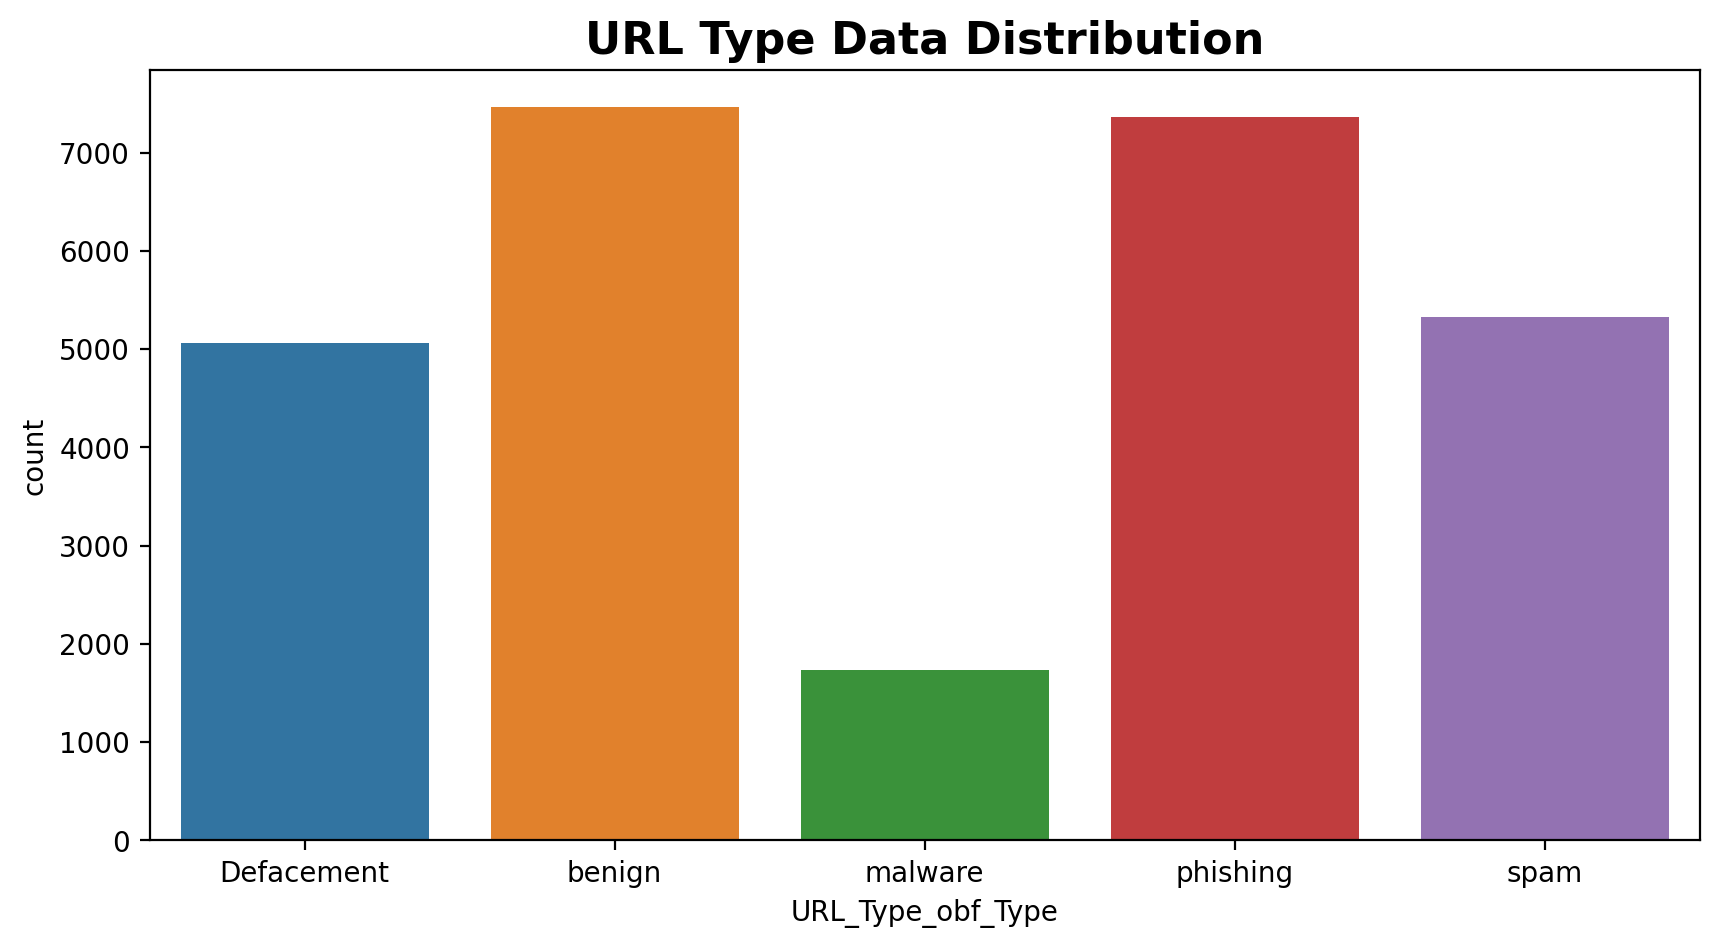

In [18]:
# Visualizing the dependent variable ("URL_Type_obf_Type") distribution
plt.figure(figsize=(10, 5), dpi=200)
sns.countplot(data=df, x="URL_Type_obf_Type", hue="URL_Type_obf_Type")
plt.title("URL Type Data Distribution", fontsize=16, fontweight="bold")
plt.savefig("./plots/data-distribution.png")
plt.show()

In [ ]:
# Saving the cleaned dataset
df.to_csv("datasets/cleaned_data.csv")